Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Pre-Processing Steps

In [4]:
# Creating the Dataframe
df=pd.read_csv('Dataset .csv')

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)

In [7]:
df.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Is delivering now     9551 non-null   object 
 4   Switch to order menu  9551 non-null   object 
 5   Price range           9551 non-null   int64  
 6   Aggregate rating      9551 non-null   float64
 7   Rating color          9551 non-null   object 
 8   Rating text           9551 non-null   object 
 9   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 746.3+ KB


In [9]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [10]:
# Checking for missing values
df.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
# Checking for duplicated values
df.duplicated().sum()

2871

In [12]:
df.dropna(inplace=True)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

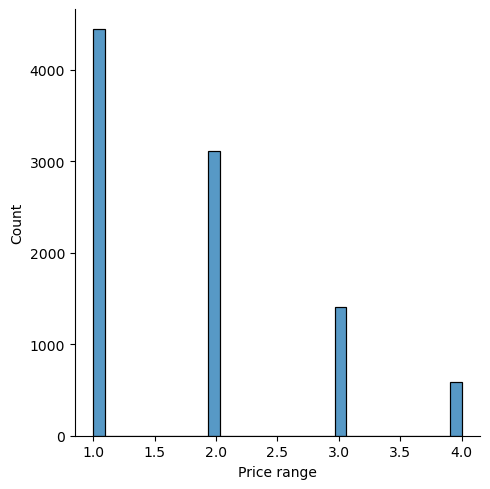

In [14]:
sns.displot(df['Price range'])

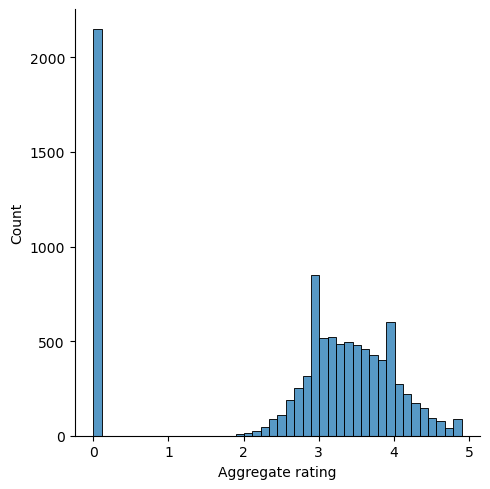

In [15]:
sns.displot(df['Aggregate rating'])

<Axes: xlabel='Rating text', ylabel='Votes'>

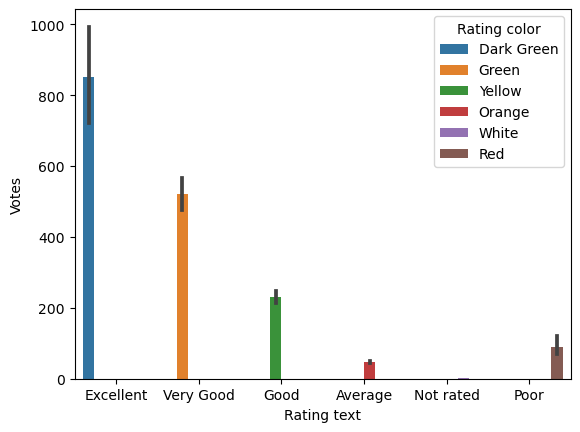

In [16]:
sns.barplot(x=df["Rating text"],y=df["Votes"],hue =df["Rating color"])

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Has Table booking'] = label_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = label_encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = label_encoder.fit_transform(df['Rating color'])
df['Rating text'] = label_encoder.fit_transform(df['Rating text'])

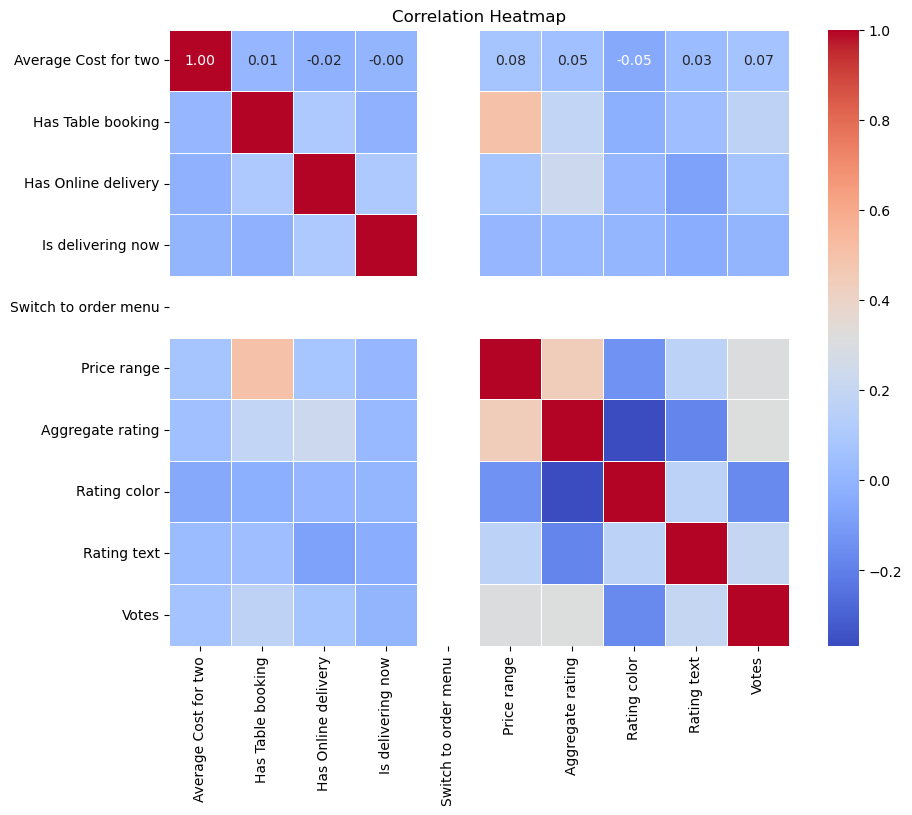

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Running the Linear Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [21]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

8696    0.0
1164    4.0
4824    3.2
7574    3.2
2961    2.3
Name: Aggregate rating, dtype: float64

In [23]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

0.4484641996519264

In [24]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 1.36
R-squared (R2) Error: 0.45


In [25]:
# Building the Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

# Evaluate the model (for regression tasks)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.04


In [27]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (RMSE): {mse:.2f}")

# Calculate R-squared (R2) Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (RMSE): 0.04
R-squared (R2) Error: 0.98


# Conclusion:
MSE of 0.05 indicates that model's predictions are very accurate & low errors.
R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.
Random Forest Regressor model is performing exceptionally well on your test data.